## Datos

In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

In [2]:
# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

# Fruits dataset 2D (with only 2 features)
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

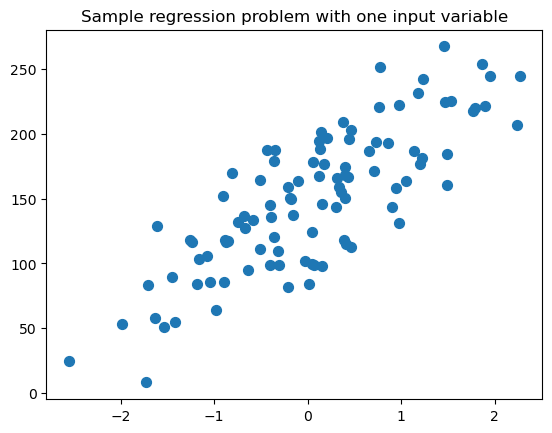

In [4]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

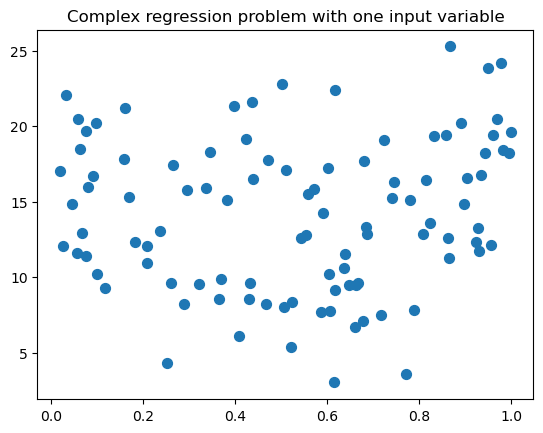

In [5]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

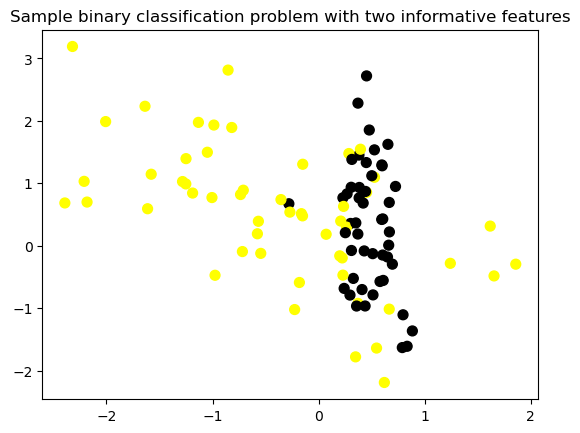

In [6]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

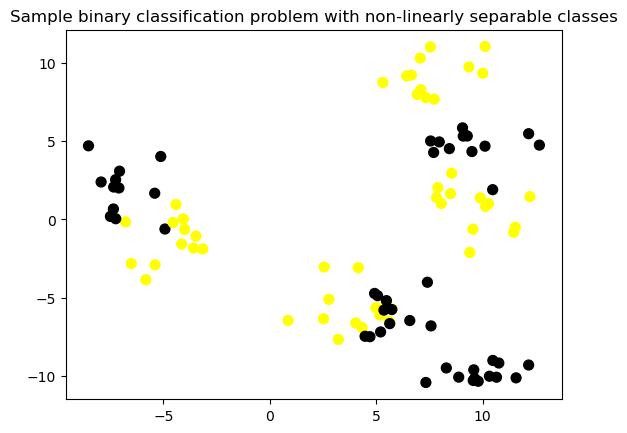

In [7]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [8]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)

clf = RandomForestClassifier(n_estimators=7, max_features=1, random_state=50).fit(X_train, y_train)

#clf = RandomForestClassifier(n_estimators=5, max_features=2, random_state=50).fit(X_train, y_train)


print('Train score:',clf.score(X_train, y_train))  
print('Test score:',clf.score(X_test, y_test)) 

Train score: 0.9866666666666667
Test score: 0.8


In [10]:
# Taking all features (there are 2 features) and select a high numbers of estimators (decission trees) increase model's complexity
clf_over = RandomForestClassifier(n_estimators=50, max_features=2, random_state=50).fit(X_train, y_train)
print('Train score:',clf_over.score(X_train, y_train))  
print('Test score:',clf_over.score(X_test, y_test)) 

Train score: 1.0
Test score: 0.76


### Random Forest: Fruit dataset

In [11]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)

clf = RandomForestClassifier(n_estimators=3, random_state=0, max_features=3).fit(X_train,y_train)


print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 0.98
Accuracy of RF classifier on test set: 0.73


Axes(0.125,0.77;0.775x0.11)
Axes(0.125,0.638;0.775x0.11)
Axes(0.125,0.506;0.775x0.11)
Axes(0.125,0.374;0.775x0.11)
Axes(0.125,0.242;0.775x0.11)
Axes(0.125,0.11;0.775x0.11)


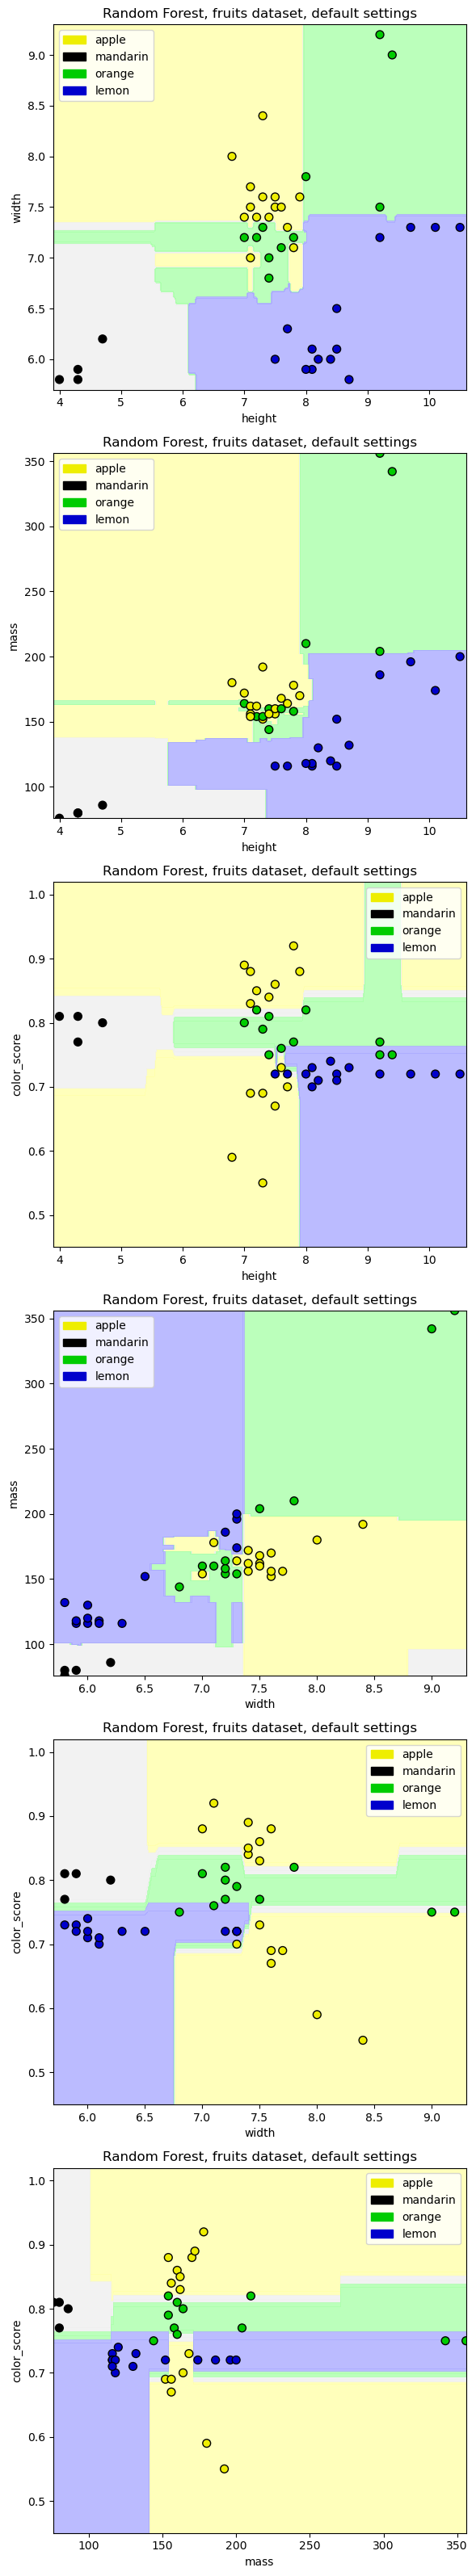

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)

fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    print(axis)
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

# Adjusting the number of estimators at 10, by default it is 100
clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Random Forests para el dataset de cáncer

In [13]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(n_estimators = 5, max_features = 0.5,  random_state = 0)
clf.fit(X_train, y_train)

# CONTROL DE OVERFIITNG: max_depth=3,

cv_scores = cross_val_score(clf, X_cancer, y_cancer, cv = 20)

# NOTA: El total de árboles entrenados sería n_estimators * cv
print(cv_scores)
print(np.mean(cv_scores))


print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

print('Accuracy of RF classifier on train set: {:.2f}'
     .format(clf.score(X_train, y_train)))

[0.96551724 0.93103448 0.96551724 0.89655172 0.93103448 0.93103448
 1.         0.93103448 0.89655172 1.         1.         0.96428571
 0.92857143 0.92857143 0.96428571 0.96428571 0.89285714 0.89285714
 0.89285714 0.92857143]
0.9402709359605911
Accuracy of RF classifier on test set: 0.97
Accuracy of RF classifier on train set: 0.99


### Gradient-boosted decision trees

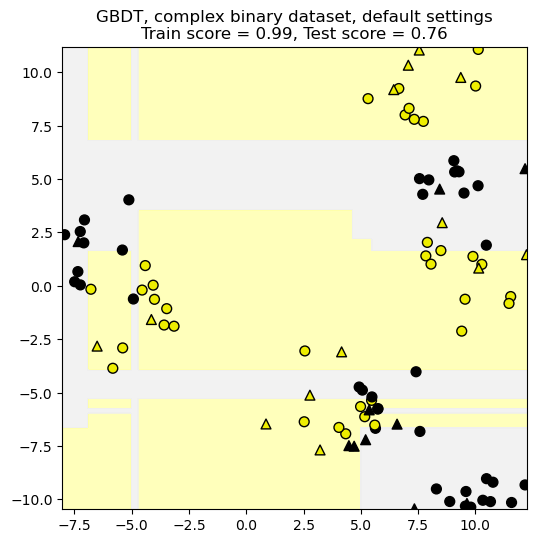

Accuracy of RF classifier on test set: 0.76
Accuracy of RF classifier on train set: 0.99


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1).fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

print('Accuracy of RF classifier on train set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Puntos clave sobre el parámetro learning_rate:
1. Controla la contribución de cada árbol a la predicción final.
2. Valores más pequeños (< 0.1) hacen que el modelo sea más robusto, pero requieren más árboles.
3. Compensación: Un learning_rate más bajo requiere un mayor número de n_estimators.
4. Rango común para ajustar: de 0.01 a 0.3.

Relaciones importantes:
- learning_rate y n_estimators están estrechamente relacionados.
- Regla general: si reduces learning_rate por un factor de 10, incrementa n_estimators por un factor de 10.

#### Gradient boosted decision trees on the fruit dataset

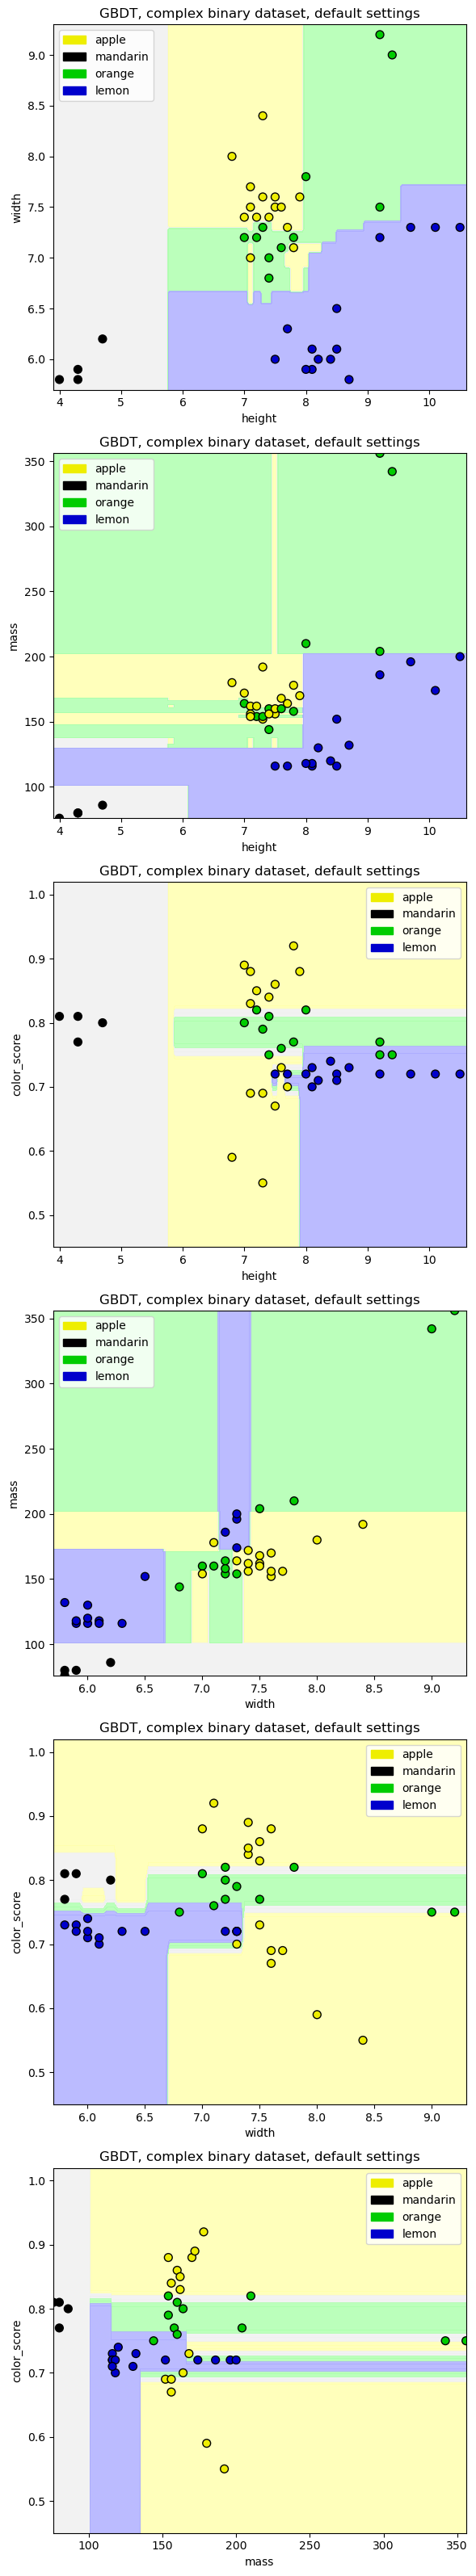

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Gradient-boosted decision trees on a real-world dataset

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


### Ejercicio: Probar el efecto con loops in range de los diferentes parámetros

In [17]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2, random_state=42)
# create model instance
bst = XGBClassifier(n_estimators=50, max_depth=1, learning_rate=0.3, objective='binary:logistic', random_state=42)
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)
print(preds)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(bst.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(bst.score(X_test, y_test)))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 1.00


In [18]:
# Predicciones del dataset
preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [24]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SGBoost classifier
sgboost = GradientBoostingClassifier(
    n_estimators=5,
    learning_rate=0.1,
    max_depth=3,
    # subsample=0.8,  # This makes it stochastic
    random_state=42
)

# Fit the model
sgboost.fit(X_train_scaled, y_train)

# Make predictions
y_pred = sgboost.predict(X_test_scaled)

# Print the results
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(sgboost.score(X_train_scaled, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(sgboost.score(X_test_scaled, y_test)))

# Print feature importance
feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'importance': sgboost.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 5 Most Important Features:")
print(feature_importance.head())

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 2 69]]
Accuracy of GBDT classifier on training set: 0.98
Accuracy of GBDT classifier on test set: 0.96

Top 5 Most Important Features:
                 feature  importance
7    mean concave points    0.512165
27  worst concave points    0.271820
20          worst radius    0.060714
22       worst perimeter    0.033013
21         worst texture    0.031609


In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Dividir el dataset en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador XGBoost
# Se agrega 'use_label_encoder=False' y 'eval_metric' para evitar warnings en versiones recientes
model = XGBClassifier(n_estimators=5, max_depth=3, learning_rate=0.1 )

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo (esto es lo mismo que llamar el método .score(X_test, y_test))
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Precisión del modelo: 0.9649122807017544

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[40  3]
 [ 1 70]]
